# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

f56afc46ae7e741502d249bb8f2d54ca


### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
#use dataset to see location of each value
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
apiKey=weather_api_key
#city="hithadhoo"
city_url = f"{url}appid={apiKey}&units={units}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)


{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.2, 'feels_like': 84.52, 'temp_min': 80.2, 'temp_max': 80.2, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 15.84, 'deg': 71, 'gust': 16.78}, 'rain': {'1h': 0.35}, 'clouds': {'all': 51}, 'dt': 1680098999, 'sys': {'country': 'PF', 'sunrise': 1680103185, 'sunset': 1680146508}, 'timezone': -34200, 'id': 4020109, 'name': 'Atuona', 'cod': 200}


In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
apiKey=weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={apiKey}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | luwuk
Processing Record 3 of Set 1 | wawa
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | luau
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | langham
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | yol
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | puerto carreno
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | ambovombe
Processing Record

Processing Record 38 of Set 4 | tecate
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | pula
Processing Record 43 of Set 4 | raudeberg
Processing Record 44 of Set 4 | lolua
City not found. Skipping...
Processing Record 45 of Set 4 | kapaa
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | fort morgan
Processing Record 48 of Set 4 | wahiawa
Processing Record 49 of Set 4 | yenagoa
Processing Record 0 of Set 5 | cozumel
Processing Record 1 of Set 5 | winsum
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | las vegas
Processing Record 6 of Set 5 | utete
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | kargasok
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | kropotkin
Proc

Processing Record 30 of Set 8 | flinders
Processing Record 31 of Set 8 | roma
Processing Record 32 of Set 8 | filadelfia
Processing Record 33 of Set 8 | santa cruz del sur
Processing Record 34 of Set 8 | marabba
Processing Record 35 of Set 8 | gazanjyk
Processing Record 36 of Set 8 | arlit
Processing Record 37 of Set 8 | half moon bay
Processing Record 38 of Set 8 | banjar
Processing Record 39 of Set 8 | sorvag
City not found. Skipping...
Processing Record 40 of Set 8 | pando
Processing Record 41 of Set 8 | tawkar
City not found. Skipping...
Processing Record 42 of Set 8 | goundam
Processing Record 43 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 8 | akdagmadeni
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | lompoc
Processing Record 47 of Set 8 | san lorenzo
Processing Record 48 of Set 8 | les cayes
Processing Record 49 of Set 8 | sibolga
Processing Record 0 of Set 9 | bondo
Processing Record 1 of Set 9 | ust-kuyga
Processing R

Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | yar-sale
Processing Record 18 of Set 12 | natal
Processing Record 19 of Set 12 | boddam
Processing Record 20 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 21 of Set 12 | great yarmouth
Processing Record 22 of Set 12 | cherbourg
Processing Record 23 of Set 12 | san quintin
Processing Record 24 of Set 12 | comodoro rivadavia
Processing Record 25 of Set 12 | priargunsk
Processing Record 26 of Set 12 | cururupu
Processing Record 27 of Set 12 | erdaojiang
Processing Record 28 of Set 12 | alamosa
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | sinnamary
Processing Record 31 of Set 12 | jamiltepec
Processing Record 32 of Set 12 | richards bay
Processing Record 33 of Set 12 | bereda
Processing Record 34 of Set 12 | waipawa
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | lebanon
Processing Record 37 of Set 12 | stryn
Processing Record 38 of Set

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,5.01,81,40,5.66,CL,1680100146
1,luwuk,-0.9516,122.7875,25.48,87,100,1.05,ID,1680100146
2,wawa,9.9022,4.4192,37.81,16,85,2.11,NG,1680100146
3,avarua,-21.2078,-159.7750,25.03,100,75,2.57,CK,1680100147
4,luau,-10.7073,22.2247,24.45,76,94,1.83,AO,1680100147


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,5.01,81,40,5.66,CL,1680100146
1,luwuk,-0.9516,122.7875,25.48,87,100,1.05,ID,1680100146
2,wawa,9.9022,4.4192,37.81,16,85,2.11,NG,1680100146
3,avarua,-21.2078,-159.7750,25.03,100,75,2.57,CK,1680100147
4,luau,-10.7073,22.2247,24.45,76,94,1.83,AO,1680100147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

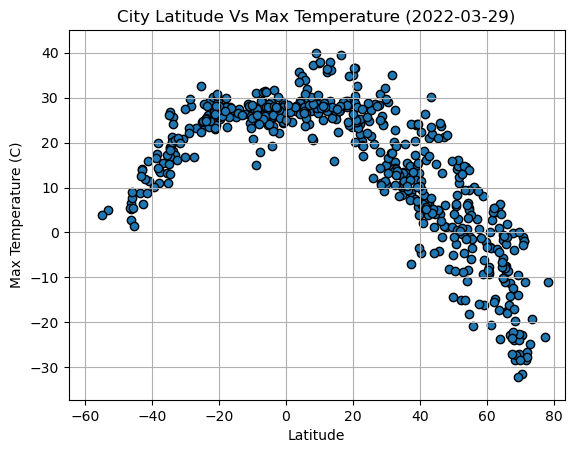

In [46]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude Vs Max Temperature (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

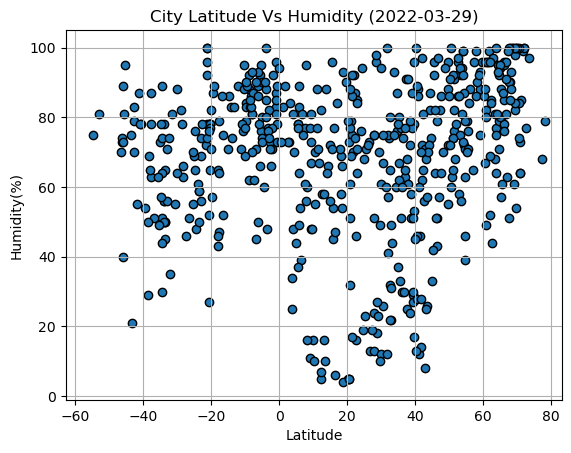

In [52]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude Vs Humidity (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

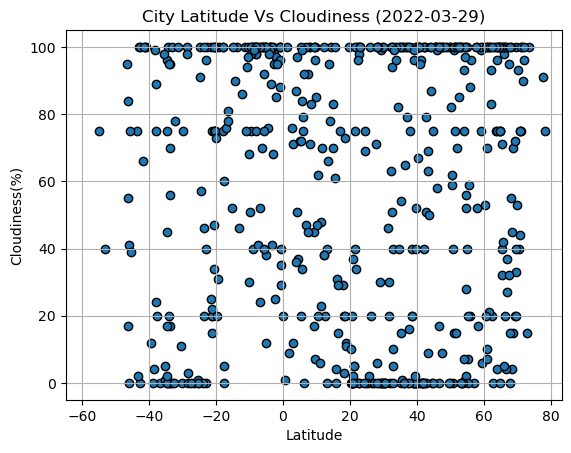

In [56]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude Vs Cloudiness (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

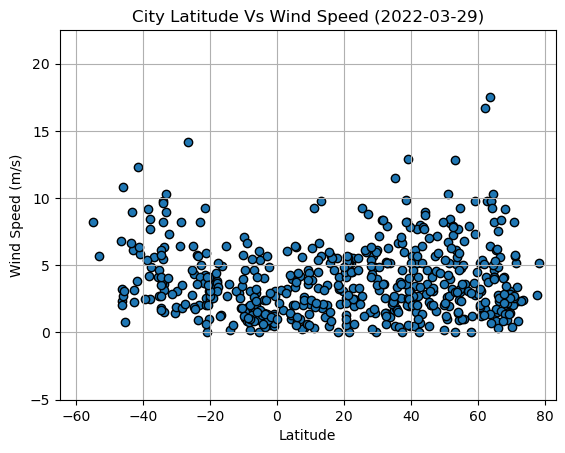

In [55]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-03-29)')
plt.xlim(min(x_values)-10, max(x_values)+ 5)
plt.ylim(min(y_values)- 5, max(y_values) + 5)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
x=
(slope, intercept, rvalue, pvalue, stderr) = linregress(merge_TumVol_weight["Weight (g)"], merge_TumVol_weight["Tumor Volume (mm3)_x"])

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE